Þykkt sýnis = 525 E-06 m
Geymum dataskrár í fylki þar sem channel er í dálkum og hitastig í línum. <br />
annað hvert channel er polarity-switch <br />
channel [1,4]: Hall frændi <br />
channel [5,8]: Van der Pauw $R_A$(vertical) - notum bara $B=0$<br />
channel [9,12]: Van der Pauw $R_B$(horizontal) - notum bara $B=0$ <br />


[1.13377120e+06 4.42755766e+05 1.70063888e+05 7.23432981e+04
 3.19865929e+04 1.56034666e+04 8.09660389e+03 4.19054479e+03
 2.48215732e+03 1.55109439e+03 9.96811114e+02 6.82978079e+02
 4.51861754e+02 3.49682961e+02 2.74665658e+02 2.20749878e+02
 1.80310930e+02 1.50750032e+02 7.65209397e+01 4.64408917e+01
 3.17120086e+01 2.39746220e+01 1.93423750e+01 1.63955649e+01
 1.44779463e+01 1.32559153e+01 1.19565666e+01 1.16287427e+01
 1.19081049e+01 1.26163941e+01 1.50182240e+01 1.85414542e+01
 2.31219964e+01 2.87987870e+01 3.55931870e+01 4.35650706e+01
 5.26350469e+01 6.27778170e+01 7.32731925e+01]


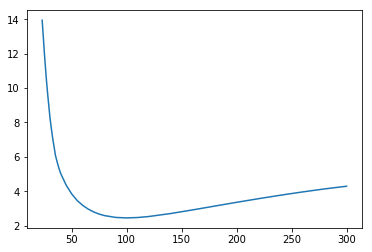

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#f_hitastig = 5# Fjöldi hitastigsmælinga
hitastig=np.arange(23,41,1) # og svo frvs....
hitastig=np.append(hitastig,np.arange(45,85,5))
hitastig=np.append(hitastig,np.arange(90,130,10))
hitastig=np.append(hitastig,np.arange(140,320,20))
f_hitastig = len(hitastig)

nofn = np.empty([f_hitastig, 12], dtype="U28")
data_hall = np.empty([f_hitastig,4], dtype=object)
data_pauw = np.empty([f_hitastig,8], dtype=object)
for i in range(0,f_hitastig):
    for j in range(0,12):
        nofn[i,j] = 'ch'+str(j+1)+'_T'+str(hitastig[i])+'_00Si_Kemil.dat'
        if j<4:
            data_hall[i,j] = np.loadtxt(nofn[i,j], delimiter='\t', unpack=False,skiprows=1)
            if j == 1:
                data_hall[i,j-1]=np.r_['0,2',data_hall[i,j][0,:],data_hall[i,j-1]]
        if j>=4:
            data_pauw[i,j-4] = np.loadtxt(nofn[i,j], delimiter='\t', unpack=False,skiprows=1)

            
def sheetResistance(pauw):
    R_A = (pauw[0][3,4]+pauw[1][3,4]+pauw[2][3,4]+pauw[3][3,4])/4
    R_B = (pauw[4][3,4]+pauw[5][3,4]+pauw[6][3,4]+pauw[7][3,4])/4
    error=1.0
    z = 2*np.log(2)/(np.pi*(R_A+R_B))
    while(error>0.0005):
        y = 1/np.exp(np.pi*z*R_A) + 1/np.exp(np.pi*z*R_B)
        temp = z
        z = z - ((1-y)/np.pi)/(R_A/np.exp(np.pi*z*R_A) + R_B/np.exp(np.pi*z*R_B))
        error = np.abs((z-temp)/z)
    R_s = 1/z
    return R_s

R_s = np.zeros(f_hitastig)
for i in range(f_hitastig):
    pauw = data_pauw[i,:]
    R_s[i] = sheetResistance(pauw)
print(R_s)
plt.plot(hitastig,np.log(R_s))

Calculate and plot the carrier density of the sample
as a function of temperature

39


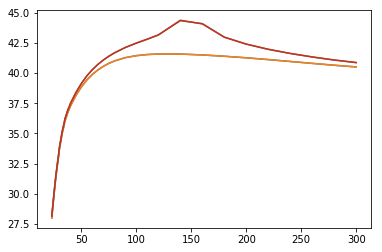

In [27]:
def carrierDensity(hall):
    I = hall[0,2]
    B = hall[0,1]
    q = 1.602E-19
    V_H = hall[0,3]
    n_s = I*B/(q*np.abs(V_H))
    return n_s
n_s0 = np.zeros(f_hitastig) 
n_s1 = np.zeros(f_hitastig) 
n_s2 = np.zeros(f_hitastig) 
n_s3 = np.zeros(f_hitastig)

for i in range(f_hitastig):
    hall0 = data_hall[i,0]
    hall1 = data_hall[i,1]
    hall2 = data_hall[i,2]
    hall3 = data_hall[i,3]
    n_s0[i] = carrierDensity(hall0)
    n_s1[i] = carrierDensity(hall1)
    n_s2[i] = carrierDensity(hall2)
    n_s3[i] = carrierDensity(hall3)

print(f_hitastig)
plt.plot(hitastig,np.log(n_s0))
plt.plot(hitastig,np.log(n_s1))
plt.plot(hitastig,np.log(n_s2))
plt.plot(hitastig,np.log(n_s3))

Reiknum (Hall)mobility og plottum sem fall af hitastigi

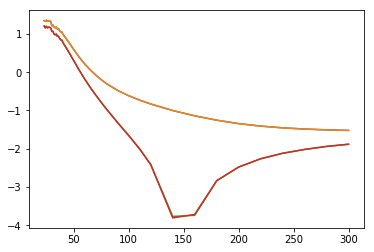

In [28]:
def hallMobility(n_s,R_s):
    q=1.602E-19
    mu = 1/(q*n_s*R_s)
    return mu
mu0 = np.zeros(f_hitastig) 
mu1 = np.zeros(f_hitastig) 
mu2 = np.zeros(f_hitastig) 
mu3 = np.zeros(f_hitastig)
for i in range(f_hitastig):
    mu0[i] = hallMobility(n_s0[i],R_s[i])
    mu1[i] = hallMobility(n_s1[i],R_s[i])
    mu2[i] = hallMobility(n_s2[i],R_s[i])
    mu3[i] = hallMobility(n_s3[i],R_s[i])
plt.plot(hitastig,np.log(mu0))
plt.plot(hitastig,np.log(mu1))
plt.plot(hitastig,np.log(mu2))
plt.plot(hitastig,np.log(mu3))
    